# NIVEL DE AGUA CUENCA ALTA Y MEDIA DEL RIO CHICAMOCHA

Monitoreo y Gestión de Inundaciones: El aumento repentino del nivel del río es un claro indicador de que podría haber riesgos de inundación, especialmente en temporadas de lluvias fuertes. La predicción de niveles de agua usando datos históricos permite generar alertas tempranas que ayudan a mitigar el daño en zonas habitadas o agrícolas.

Impacto del Cambio Climático: Los patrones de lluvia y sequía están cambiando debido al cambio climático, lo que afecta la cantidad y el momento en que los ríos reciben agua. Un modelo de regresión basado en datos históricos de nivel del río permite analizar cómo estas variaciones afectan el caudal del río y predecir el comportamiento futuro ante eventos extremos.

Conservación de Ecosistemas Fluviales: Los ríos son hábitats vitales para la biodiversidad. Cambios en los niveles de agua pueden afectar la fauna y flora que dependen de caudales constantes. La predicción de los niveles del río mediante regresión permite entender mejor cómo las actividades humanas y los eventos naturales influyen en el ecosistema.

Gestión de Recursos Hídricos: Los ríos son fuentes esenciales de agua dulce para consumo humano, agricultura y generación de energía hidroeléctrica. Usar la regresión para prever cambios en el nivel de un río ayuda a gestionar de manera eficiente el uso del agua, garantizando un suministro sostenible.

## Fase 1

In [1]:
!pip install sodapy

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sodapy import Socrata

In [4]:
cliente=Socrata('www.datos.gov.co', None)
result=cliente.get("k4mu-fgii", limit=50000)
df=pd.DataFrame.from_records(result)
df

,nivel_m,estaci_n,mes_de_fecha,d_a_de_fecha,hora_de_fecha
0,1,Acerías Paz del Río,enero,1,0
1,1,Acerías Paz del Río,enero,1,1
2,1,Acerías Paz del Río,enero,1,2
3,1,Acerías Paz del Río,enero,1,3
4,1,Acerías Paz del Río,enero,1,4
...,...,...,...,...,...
47110,3.6,Vía Pantano de Vargas,junio,30,19
47111,3.66,Vía Pantano de Vargas,junio,30,20
47112,3.67,Vía Pantano de Vargas,junio,30,21
47113,3.63,Vía Pantano de Vargas,junio,30,22


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47115 entries, 0 to 47114
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   nivel_m        45456 non-null  object
 1   estaci_n       47115 non-null  object
 2   mes_de_fecha   47115 non-null  object
 3   d_a_de_fecha   47115 non-null  object
 4   hora_de_fecha  47115 non-null  object
dtypes: object(5)
memory usage: 1.8+ MB


In [6]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45456 entries, 0 to 47114
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   nivel_m        45456 non-null  object
 1   estaci_n       45456 non-null  object
 2   mes_de_fecha   45456 non-null  object
 3   d_a_de_fecha   45456 non-null  object
 4   hora_de_fecha  45456 non-null  object
dtypes: object(5)
memory usage: 2.1+ MB


In [7]:
estaciones=list(df['estaci_n'].unique())
estaciones

['Acerías Paz del Río',
 'Agua Blanca',
 'Aguatendida',
 'Arboleda',
 'Compuerta Lago Sochagota',
 'Confluencia',
 'Descarga Gensa',
 'El Molino',
 'Electrosochagota',
 'Entrada Lago Sochagota',
 'Playa Abajo',
 'PTAR',
 'Puente Acerías',
 'Vía Pantano De Vargas',
 'Vía Pantano de Vargas']

In [10]:
df_acerias=df[df['estaci_n']=='Acerías Paz del Río']
df_acerias

,nivel_m,estaci_n,mes_de_fecha,d_a_de_fecha,hora_de_fecha
0,1,Acerías Paz del Río,enero,1,0
1,1,Acerías Paz del Río,enero,1,1
2,1,Acerías Paz del Río,enero,1,2
3,1,Acerías Paz del Río,enero,1,3
4,1,Acerías Paz del Río,enero,1,4
...,...,...,...,...,...
4023,2.8,Acerías Paz del Río,junio,30,19
4024,2.84,Acerías Paz del Río,junio,30,20
4025,2.86,Acerías Paz del Río,junio,30,21
4026,2.89,Acerías Paz del Río,junio,30,22


In [11]:
df_acerias.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4028 entries, 0 to 4027
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   nivel_m        4028 non-null   object
 1   estaci_n       4028 non-null   object
 2   mes_de_fecha   4028 non-null   object
 3   d_a_de_fecha   4028 non-null   object
 4   hora_de_fecha  4028 non-null   object
dtypes: object(5)
memory usage: 188.8+ KB


In [12]:
df_acerias['nivel_m'] = df_acerias['nivel_m'].astype(float)
df_acerias.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4028 entries, 0 to 4027
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   nivel_m        4028 non-null   float64
 1   estaci_n       4028 non-null   object 
 2   mes_de_fecha   4028 non-null   object 
 3   d_a_de_fecha   4028 non-null   object 
 4   hora_de_fecha  4028 non-null   object 
dtypes: float64(1), object(4)
memory usage: 188.8+ KB


<ipython-input-12-f5c9808e56da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acerias['nivel_m'] = df_acerias['nivel_m'].astype(float)


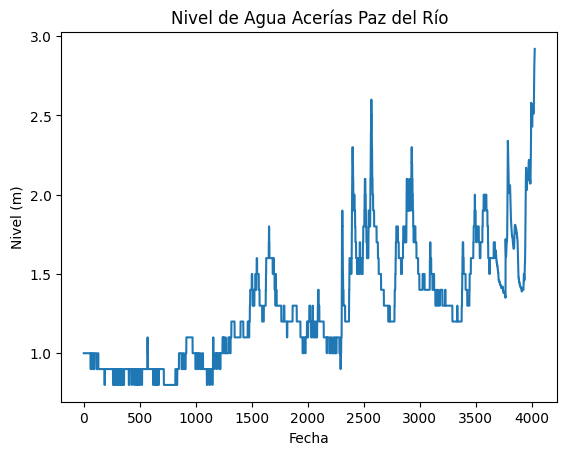

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(df_acerias.index, df_acerias['nivel_m'])
plt.title('Nivel de Agua Acerías Paz del Río')
plt.xlabel('Fecha')
plt.ylabel('Nivel (m)')
plt.show()

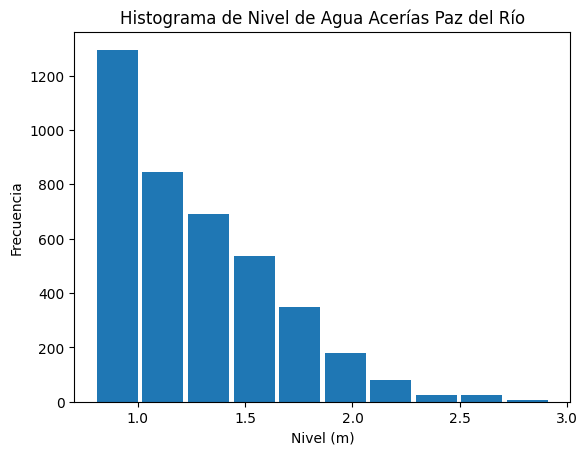

In [16]:
plt.hist(df_acerias['nivel_m'], rwidth=0.9)
plt.title('Histograma de Nivel de Agua Acerías Paz del Río')
plt.xlabel('Nivel (m)')
plt.ylabel('Frecuencia')
plt.show()

# Fase 2

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

### Predicción por 3 dias anteriores

In [18]:
datos1=df_acerias[(df_acerias['mes_de_fecha']=='enero') & (df_acerias['d_a_de_fecha']=='1')]
datos2=df_acerias[(df_acerias['mes_de_fecha']=='enero') & (df_acerias['d_a_de_fecha']=='2')]
datos3=df_acerias[(df_acerias['mes_de_fecha']=='enero') & (df_acerias['d_a_de_fecha']=='3')]
y=df_acerias[(df_acerias['mes_de_fecha']=='enero') & (df_acerias['d_a_de_fecha']=='4')]

In [21]:
datos={'nivel 1':list(datos1['nivel_m'].values),
       'nivel 2':list(datos2['nivel_m'].values),
       'nivel 3':list(datos3['nivel_m'].values),
       'nivel actual':list(y['nivel_m'].values),}
print(datos)

{'nivel 1': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'nivel 2': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'nivel 3': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 0.9, 0.9, 1.0, 1.0, 1.0, 0.9, 0.9, 0.9, 0.9, 0.9], 'nivel actual': [0.9, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 1.0, 1.0]}


In [23]:
df=pd.DataFrame(datos)
df

,nivel 1,nivel 2,nivel 3,nivel actual
0,1.0,1.0,1.0,0.9
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0


In [24]:
X=df[['nivel 1', 'nivel 2', 'nivel 3']]
y=df['nivel actual']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_test

,nivel actual
8,1.0
16,0.9
0,0.9
18,0.9
11,1.0


In [29]:
def crear_pipeline(modelo):
  pipeline= Pipeline([
      ('escalar', StandardScaler()),
      ('modelo', modelo)
  ])
  return pipeline

In [66]:
def evaluar_modelo(pipeline, X_train, X_test, y_train, y_test, nombre):
  #entrenamiento con el modelo
  pipeline.fit(X_train, y_train)
  #predecir los valorex de y
  y_pred=pipeline.predict(X_test)

  #metricas modelo
  rmse=mean_squared_error(y_test, y_pred)
  r_2=r2_score(y_test, y_pred)
  print('********* Metricas modelo **************')
  print(f'MSE: {rmse}')
  print(f'R2: {r_2}')

  plt.scatter(y_test, y_pred)
  plt.xlabel('Valores reales')
  plt.ylabel('Valores predichos')
  plt.title('Valores reales vs valores predichos modelo '+nombre)
  plt.grid()
  plt.show()
  return y_pred



********* Metricas modelo **************
MSE: 0.04718822930912186
R2: 0.02806704737106147


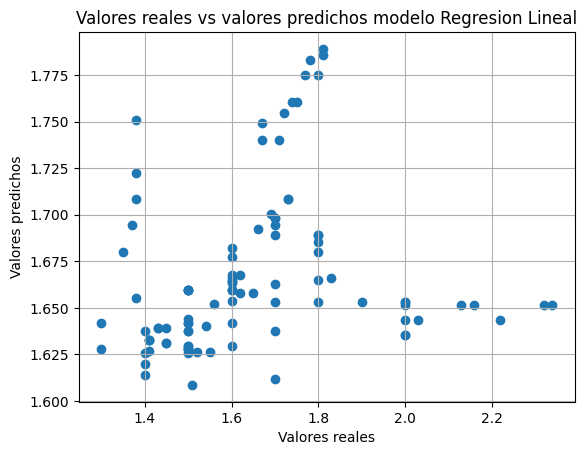

********* Metricas modelo **************
MSE: 0.03253372376334755
R2: 0.3299049644312011


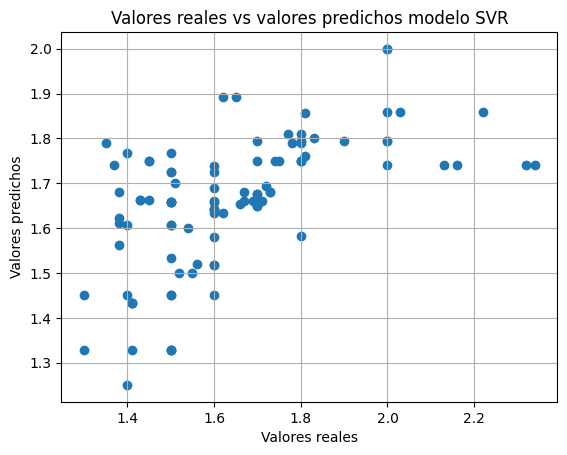

********* Metricas modelo **************
MSE: 0.01291546056083658
R2: 0.7339810816967884


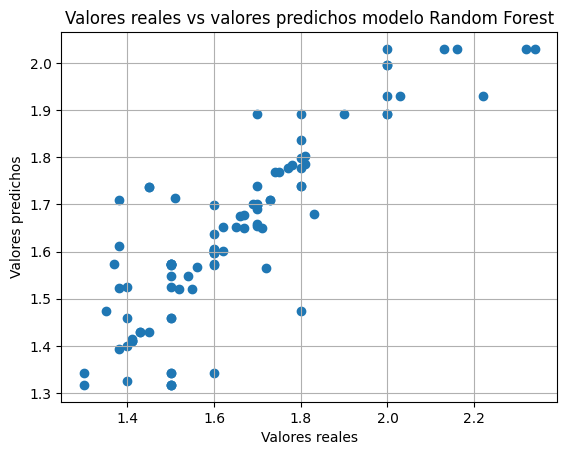

In [99]:
modelos=[
    ('Regresion Lineal', LinearRegression()),
    ('SVR', SVR(epsilon=0.05)),
    ('Random Forest', RandomForestRegressor(n_estimators=1000))
]

for nombre, modelo in modelos:
  pipeline=crear_pipeline(modelo)
  evaluar_modelo(pipeline, X_train, X_test, y_train, y_test, nombre)

### Predicción por meses

In [84]:
datos1=df_acerias[(df_acerias['mes_de_fecha']=='marzo')]
datos2=df_acerias[(df_acerias['mes_de_fecha']=='abril')]
datos3=df_acerias[(df_acerias['mes_de_fecha']=='mayo')]
y=df_acerias[(df_acerias['mes_de_fecha']=='junio') ]

In [53]:
#datos1.iloc[:672, 0]
#list(datos1.iloc[:672,0].values)

In [91]:
datos={'marzo':list(datos1.iloc[:500,0].values),
       'abril':list(datos2.iloc[:500,0].values),
       'mayo':list(datos3.iloc[:500,0].values),
       'junio':list(y.iloc[:500,0].values)}
print(datos)

{'marzo': [1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.2, 1.2, 1.2, 1.2, 1.2, 1.3, 1.3, 1.3, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.5, 1.5, 1.5, 1.5, 1.5, 1.4, 1.4, 1.4, 1.3, 1.3, 1.3, 1.3, 1.3, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.3, 1.3, 1.3, 1.3, 1.3, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.5, 1.5, 1.5, 1.5, 1.4, 1.4, 1.4, 1.4, 1.5, 1.5, 1.5, 1.6, 1.6, 1.6, 1.6, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3,

In [92]:
df=pd.DataFrame(datos)
df

,marzo,abril,mayo,junio
0,1.1,1.2,1.5,1.40
1,1.1,1.2,1.5,1.40
2,1.1,1.2,1.5,1.50
3,1.1,1.2,1.5,1.50
4,1.1,1.1,1.5,1.60
...,...,...,...,...
495,1.3,1.7,1.4,1.71
496,1.3,1.7,1.4,1.70
497,1.3,1.7,1.4,1.67
498,1.3,1.7,1.4,1.64


In [93]:
X=df[['marzo', 'abril','mayo']]
y=df['junio']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_test

,junio
361,1.41
73,1.50
374,1.38
155,1.70
104,1.80
...,...
347,1.43
86,1.60
75,1.50
438,1.83


********* Metricas modelo **************
MSE: 0.04718822930912186
R2: 0.02806704737106147


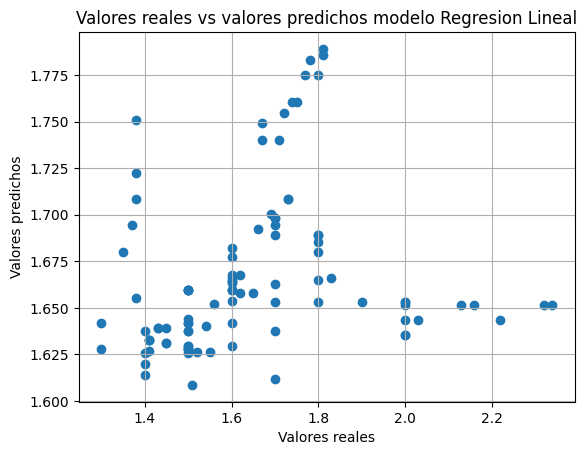

********* Metricas modelo **************
MSE: 0.030300998409020195
R2: 0.37589226630314043


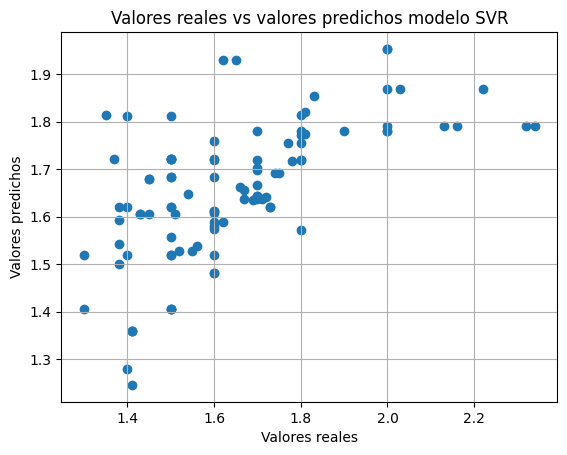

********* Metricas modelo **************
MSE: 0.013366554232620488
R2: 0.7246899340790833


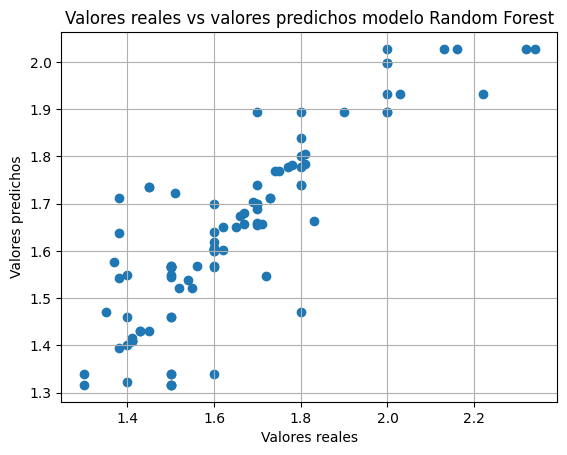

In [105]:
modelos=[
    ('Regresion Lineal', LinearRegression()),
    ('SVR', SVR(kernel='rbf',epsilon=0.12)),
    ('Random Forest', RandomForestRegressor(n_estimators=110))
]

y_pred=[[],[],[]]
i=0
for nombre, modelo in modelos:
  pipeline=crear_pipeline(modelo)
  y_pred[i]=evaluar_modelo(pipeline, X_train, X_test, y_train, y_test, nombre)
  i+=1

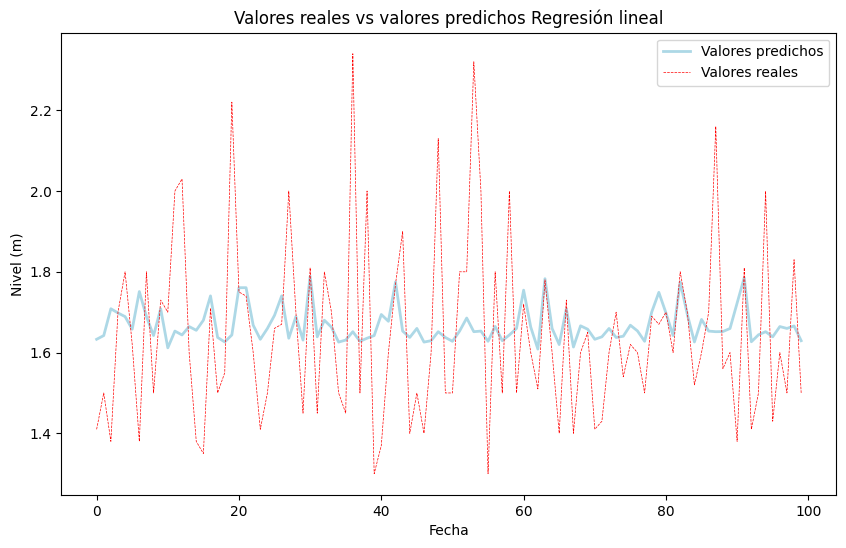

In [106]:
plt.figure(figsize=(10, 6))
plt.plot(y_pred[0], c='lightblue', label='Valores predichos', linewidth=2)
plt.plot(y_test.values, 'r--', label='Valores reales', linewidth=0.5)
plt.title('Valores reales vs valores predichos Regresión lineal')
plt.xlabel('Fecha')
plt.ylabel('Nivel (m)')
plt.legend()
plt.show()


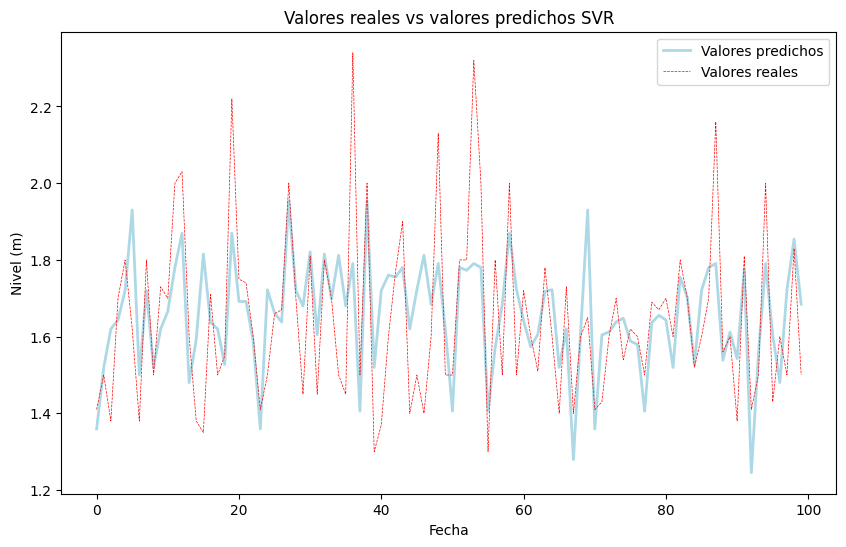

In [107]:
plt.figure(figsize=(10, 6))
plt.plot(y_pred[1], c='lightblue', label='Valores predichos', linewidth=2)
plt.plot(y_test.values, 'r--', label='Valores reales', linewidth=0.5)
plt.title('Valores reales vs valores predichos SVR')
plt.xlabel('Fecha')
plt.ylabel('Nivel (m)')
plt.legend()
plt.show()

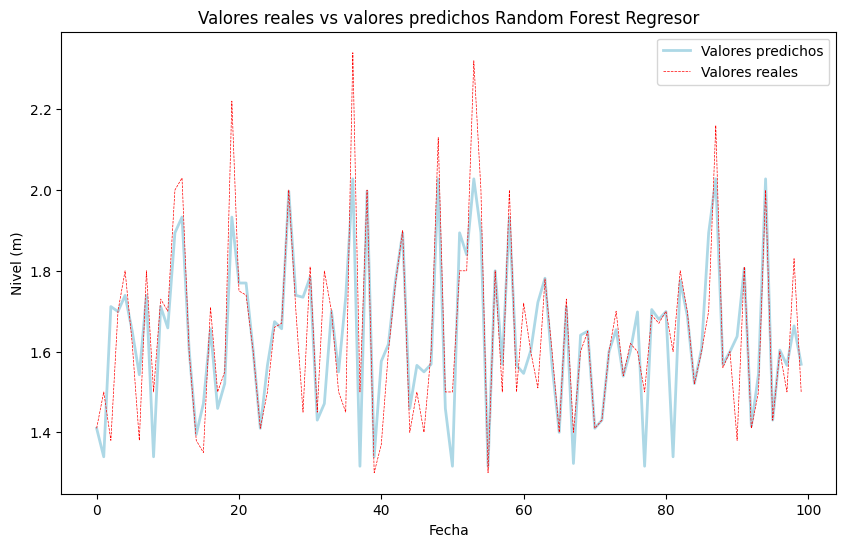

In [108]:
plt.figure(figsize=(10, 6))
plt.plot(y_pred[2], c='lightblue', label='Valores predichos', linewidth=2)
plt.plot(y_test.values, 'r--', label='Valores reales', linewidth=0.5)
plt.title('Valores reales vs valores predichos Random Forest Regresor')
plt.xlabel('Fecha')
plt.ylabel('Nivel (m)')
plt.legend()
plt.show()

## Fase 3

Text(0.5, 1.0, 'Gráfico de dispersión PCA')

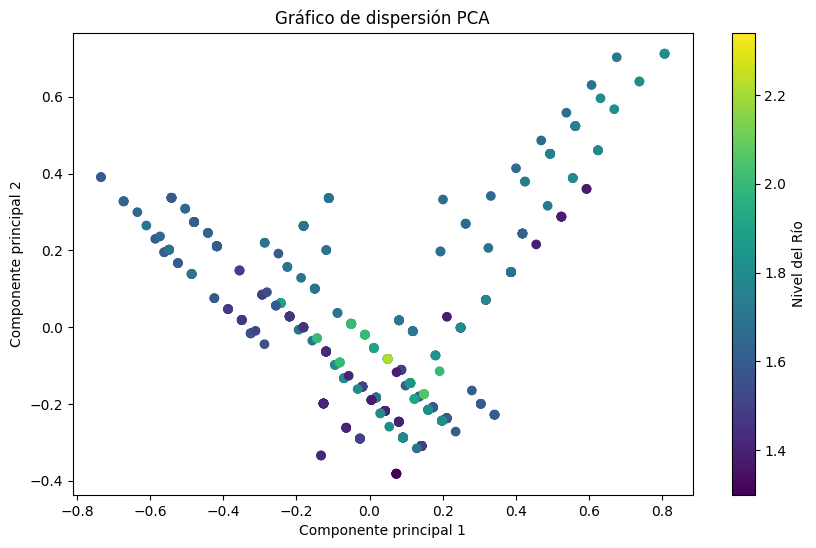

In [115]:
pca= PCA(n_components=3)
x_pca=pca.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y)#, c=y)#label='Valores predichos')
plt.colorbar(label='Nivel del Río')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Gráfico de dispersión PCA')

In [116]:
print(pca.explained_variance_ratio_)

[0.57706385 0.35282271 0.07011344]
